In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('CarPrice.csv')

# Data Wrangling

In [25]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [26]:
df.dropna(inplace=True)

In [27]:
df.drop_duplicates(inplace=True)
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399
5,Hyundai,2012,500000,53000,Diesel,Individual,Manual,Second Owner,5,90.00,kmpl,23.00,1396
6,Maruti,2002,150000,80000,Petrol,Individual,Manual,Second Owner,5,46.30,kmpl,19.70,796
7,Hyundai,2016,680000,100000,Diesel,Individual,Manual,First Owner,5,88.73,kmpl,22.54,1396
8,Mahindra,2011,174000,100000,Diesel,Individual,Manual,Second Owner,5,64.10,kmpl,21.00,1461
9,Maruti,2012,600000,72000,Diesel,Individual,Manual,First Owner,5,88.80,kmpl,21.50,1248


In [28]:
df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
seats                   int64
max_power (in bph)    float64
Mileage Unit           object
Mileage               float64
Engine (CC)             int64
dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                2095 non-null   object 
 1   year                2095 non-null   int64  
 2   selling_price       2095 non-null   int64  
 3   km_driven           2095 non-null   int64  
 4   fuel                2095 non-null   object 
 5   seller_type         2095 non-null   object 
 6   transmission        2095 non-null   object 
 7   owner               2095 non-null   object 
 8   seats               2095 non-null   int64  
 9   max_power (in bph)  2095 non-null   float64
 10  Mileage Unit        2095 non-null   object 
 11  Mileage             2095 non-null   float64
 12  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 212.9+ KB


In [30]:
df.shape

(2095, 13)

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

<Axes: >

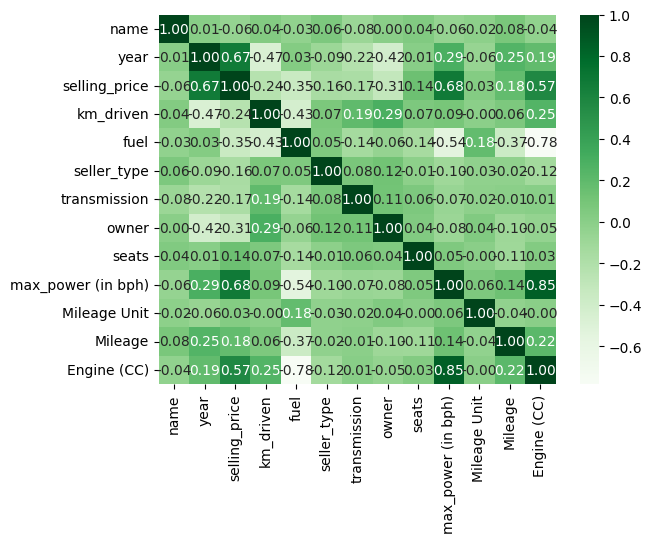

In [32]:
label_encoder = preprocessing.LabelEncoder()

heat_map = df.copy()

columns = heat_map.select_dtypes(include='object').columns

for col in columns:
    heat_map[col] = label_encoder.fit_transform(heat_map[col])

sns.heatmap(heat_map.corr(), annot=True, fmt='.2f', cmap='Greens')

# Machine Learning

In [33]:
car = df.copy()

car = car[car['km_driven'] >= 100000]
#car = car[car['seats'] == 5]
car = car[car['max_power (in bph)'] > 120]
#car = car[car['year'] == 2020]
#car = car[car['Engine (CC)'] == 1500]


In [34]:
df.describe()

,year,selling_price,km_driven,seats,max_power (in bph),Mileage,Engine (CC)
count,2095.000000,2.095000e+03,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000
mean,2014.052506,4.272799e+05,67413.593795,5.096897,77.410427,21.397928,1205.078282
std,3.273451,2.326698e+05,41580.846333,0.457000,19.884938,1.209234,245.058696
min,2000.000000,4.595700e+04,1000.000000,4.000000,35.000000,19.600000,624.000000
25%,2012.000000,2.500000e+05,35000.000000,5.000000,67.040000,20.360000,998.000000
50%,2014.000000,3.900000e+05,60000.000000,5.000000,74.000000,21.100000,1248.000000
75%,2017.000000,5.555000e+05,90000.000000,5.000000,88.730000,22.540000,1396.000000
max,2020.000000,1.594000e+06,270000.000000,8.000000,126.320000,23.590000,1598.000000


## Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


label_encoder = preprocessing.LabelEncoder()

car = df.copy()

columns = car.select_dtypes(include='object').columns

for col in columns:
    car[col] = label_encoder.fit_transform(car[col])

In [36]:
X = car.drop(columns='selling_price')
y = car['selling_price']

In [37]:
model = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train,y_train)

car_price = model.predict(X_test) 



In [38]:
r2_value = model.score(X_train, y_train)
r2_value

0.9836117795607572

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, car_price)
mse

np.float64(7442699572.419466)

In [40]:
rmse = np.sqrt(mse)
rmse

np.float64(86271.0819012922)

In [41]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train, cv=15)
score

array([0.8729218 , 0.86377445, 0.88795557, 0.91326358, 0.91935105,
       0.8802727 , 0.91576474, 0.86490857, 0.89665773, 0.91324836,
       0.92301846, 0.85109638, 0.90451735, 0.87146251, 0.91895748])

In [42]:
np.mean(score)

np.float64(0.8931447141170425)